In [1]:
# For this part of the project, we will be first creating relevant plots to see how the variables affect the severity. 

In [273]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn import linear_model
import plotly.express as px

In [209]:
#Import csv with cleaned data
raw_collision_data = pd.read_csv('Cleaned-Data-Collisions.csv').drop(columns=['Unnamed: 0'])

In [210]:
#Create the tree
y = raw_collision_data['SEVERITYCODE']
x = raw_collision_data.drop(columns=['SEVERITYCODE']).values
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.25, random_state=3)

In [220]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
linreg.coef_

array([ 1.92943598e-03, -1.89389716e-03,  3.30311754e-02,  7.37249178e-01,
        7.34824792e-01,  4.57437154e-02, -3.08586282e-02,  5.81040282e-02,
        8.69118581e-02, -1.20880340e-02,  3.81457136e-03,  1.03175260e-03,
        6.50187727e-02,  1.04324528e-01, -5.15644303e-03,  6.56452591e-08,
       -1.10826946e-01,  8.11233520e-04])

In [211]:
# Creating the decision tree
best_depth = 0
best_accuracy = 0
for depth in range(1, 21):
    collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    collisionTree.fit(x_trainset,y_trainset)

    # Predicting the output using the decision tree
    prediction = collisionTree.predict(x_testset)

    # Testing the accuracy of the model
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, prediction))

    if (metrics.accuracy_score(y_testset, prediction) > best_accuracy):
        best_depth = depth
        best_accuracy = metrics.accuracy_score(y_testset, prediction)
print("The best depth was: {0} and the best accuracy was: {1}".format(best_depth, best_accuracy))

DecisionTrees's Accuracy:  0.7403848277995008
DecisionTrees's Accuracy:  0.7403848277995008
DecisionTrees's Accuracy:  0.7403848277995008
DecisionTrees's Accuracy:  0.7420416639052732
DecisionTrees's Accuracy:  0.7487131906245168
DecisionTrees's Accuracy:  0.7496852011399032
DecisionTrees's Accuracy:  0.7504363001745201
DecisionTrees's Accuracy:  0.7507013939514436
DecisionTrees's Accuracy:  0.7515408575783683
DecisionTrees's Accuracy:  0.7515187664302914
DecisionTrees's Accuracy:  0.7516292221706762
DecisionTrees's Accuracy:  0.7518722247995229
DecisionTrees's Accuracy:  0.750502573618751
DecisionTrees's Accuracy:  0.749221287030287
DecisionTrees's Accuracy:  0.7471447191110522
DecisionTrees's Accuracy:  0.7460843440033579
DecisionTrees's Accuracy:  0.7454657918572029
DecisionTrees's Accuracy:  0.7431683124571984
DecisionTrees's Accuracy:  0.7401197340225771
DecisionTrees's Accuracy:  0.7366514237744936
The best depth was: 12 and the best accuracy was: 0.7518722247995229


In [212]:
# from sklearn.externals.six import StringIO
# import pydotplus
# import matplotlib.image as mpimg
# from sklearn import tree

In [230]:
# dot_data = StringIO()
# filename = "collision-tree.png"
# featureNames = raw_collision_data.columns[1:20]
# targetNames = raw_collision_data["SEVERITYCODE"].unique().tolist()
# out=tree.export_graphviz(collisionTree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100, 200))
# plt.imshow(img,interpolation='nearest')

In [223]:
jaccard = jaccard_similarity_score(y_testset, prediction)
f1_score = f1_score(y_testset, prediction, average='weighted')
accuracies = ['Score:' ,best_accuracy, jaccard, f1_score]

C:\Users\eisen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [221]:
scores_df = pd.DataFrame(columns=['','R_Squared','Jaccard_Score','F1_Score'])
acc_series = pd.Series(accuracies, index = scores_df.columns)
scores_df = scores_df.append(acc_series, ignore_index=True).set_index('')
scores_df.to_csv('Scores.csv')

In [229]:
raw_collision_data.describe()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,CROSSWALKKEY,HITPARKEDCAR,HOUROFDAY
count,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,181066.000000,1.810660e+05,181066.000000,181066.000000
mean,1.311665,2.345681,5.478174,2.480913,0.038886,0.029785,1.972590,3.710084,0.160047,0.049584,3.927711,3.500149,5.329885,0.025455,0.050667,19.509411,1.009966e+04,0.028708,11.403781
std,0.463175,0.478301,2.827011,1.375298,0.202696,0.171320,0.564807,1.375412,0.366650,0.217085,2.686812,3.632597,1.652370,0.157502,0.219317,13.014233,7.343535e+04,0.166984,6.950869
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000,7.000000
50%,1.000000,2.000000,6.000000,2.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,2.000000,1.000000,6.000000,0.000000,0.000000,18.000000,0.000000e+00,0.000000,13.000000
75%,2.000000,3.000000,8.000000,3.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,5.000000,9.000000,6.000000,0.000000,0.000000,28.000000,0.000000e+00,0.000000,17.000000
max,2.000000,3.000000,10.000000,81.000000,6.000000,2.000000,12.000000,7.000000,1.000000,1.000000,11.000000,9.000000,9.000000,1.000000,1.000000,62.000000,5.239700e+06,1.000000,23.000000


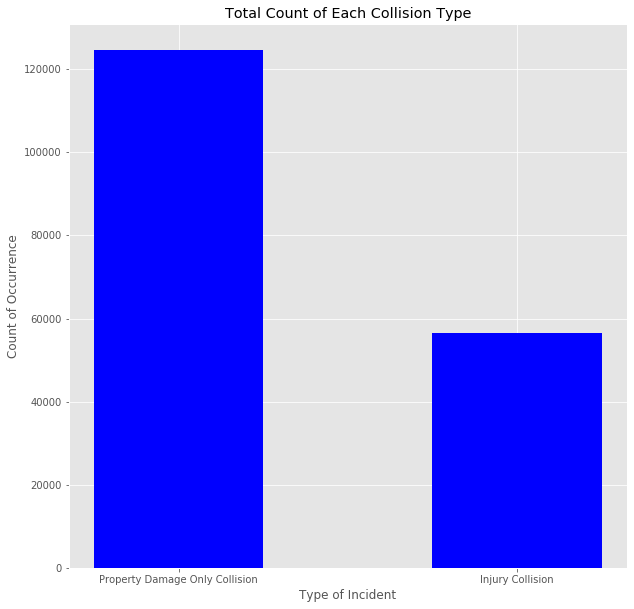

In [266]:
filename = 'SeverityCounts.png'
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
sev = ['Property Damage Only Collision', 'Injury Collision']
sev_counts = [raw_collision_data['SEVERITYCODE'].value_counts()[i] for i in range(1,len(raw_collision_data['SEVERITYCODE'].value_counts().to_list())+1)]


plt.bar(sev, sev_counts, color='blue', width=.5)
plt.xlabel("Type of Incident")
plt.ylabel("Count of Occurrence")
plt.title("Total Count of Each Collision Type")

plt.xticks(sev)
plt.savefig(filename)
plt.show()

In [272]:
#

In [279]:
filename = 'SeverityCounts-px.html'


sev = ['Property Damage Only Collision', 'Injury Collision']
sev_counts = [raw_collision_data['SEVERITYCODE'].value_counts()[i] for i in range(1,len(raw_collision_data['SEVERITYCODE'].value_counts().to_list())+1)]

fig = px.bar(x=sev, y=sev_counts, title='Total Count of Each Collision Type', labels={'y':'# of Occurrences', 'x':'Classification of Incident'})
fig.show()

# with open(filename, 'w') as f:
#     f.write(fig.to_html(include_plotlyjs='cdn'))